<a href="https://colab.research.google.com/github/Arthur-Barreto/Machine-Vision/blob/main/VisComp_Class_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Class 1: Introduction

## Preliminaries

Click on the folder.png tab to the left and drag the files

* `sdx.py`;

* `insper.png`;

* `template.png`

from your computer to the sidebar. These files should be in the class pack.

If you get an `ImportError` when running the cell below, you probably didn't drag the `sdx.py` file.

If you get import warnings, try using **Ctrl+m .** (notice there is a dot there) to restart the kernel.

In [ ]:
import cv2 as cv

from sdx import *

## Loading and displaying an image

To load an image, we can call the `cv_imread` function, passing the file path. This path is relative to the `/content` folder. *(the folder displayed on the sidebar when you click on the folder.png tab for the first time)*

To display this image, we can call the `cv_imshow` function, passing the object returned by `cv_imread`.

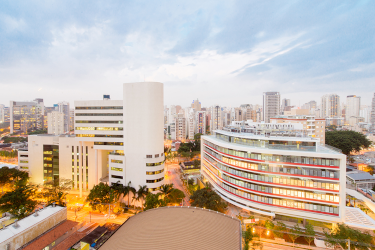

In [ ]:
image = cv_imread('insper.png')

cv_imshow(image)

## Converting color images to gray level images

The image is in color, but, for simplicity, we will focus on gray level images for now. We will discuss about color images in a future class.

To convert a color image to a gray level image, we can call the `cv.cvtColor` function, passing the image and the constant `cv.COLOR_BGR2GRAY`.

This function actually returns a second, new image. However, since there will be no use for the original, we will overwrite the same variable.

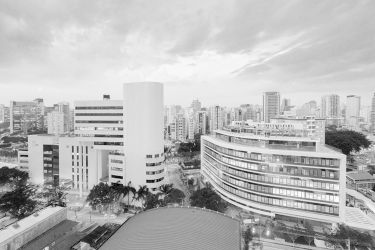

In [ ]:
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

cv_imshow(image)

## Images as arrays

As mentioned in the beginning, images can be interpreted as arrays of pixels. In fact, the object returned by `cv_imread` is *literally* a NumPy array. We can confirm that by running the cell below.

In [ ]:
image

array([[197, 198, 199, ..., 194, 194, 195],
       [198, 198, 196, ..., 195, 193, 194],
       [197, 197, 196, ..., 196, 193, 194],
       ...,
       [182, 182, 179, ...,  67,  61,  66],
       [187, 187, 181, ...,  80,  76,  76],
       [187, 186, 183, ...,  91,  94,  97]], dtype=uint8)

The first dimension of this array represents the image height and the second represents the width.

This is somewhat counterintuitive, since you are probably more used to *WIDTHxHEIGHT* than *HEIGHTxWIDTH,* so get used to it.

In [ ]:
height, width = image.shape

print(f'{height}x{width}')

250x375


Yes, this means that, to access the pixel in horizontal position `x` and vertical position `y`, we actually need to write `image[y, x]`.

To make this somewhat more intuitive, we will usually refer to these positions as "row" and "column". This fits well with the fact that the row indices are counted from the top.

In [ ]:
x = 200
y = 100

image[y, x] # pixel in row 100 (from top to bottom) and column 200 (from left to right)

233

As you can see in the output above, pixels in gray level images are integers. More specifically, they are integers between `0` and `255` (inclusive). You can think of each pixel as a representation of brightness: the higher the value, the brighter the pixel.

This means that a value of `0` represents pure black and a value of `255` represents pure white.

## Activity 1: what is darkness?

Also in the beginning, we summarized computer vision as "inferring high-level information from the raw representation of an image".

The raw representation here is, obviously, the NumPy array. Let's try to infer a very simple high-level information: **whether the image is dark**.

Write a function that receives an image and returns a boolean. More specifically:

* the function should iterate over all pixels and calculate their average;

* if this average is below `128`, it should return `True`;

* otherwise, should return `False`.

Then, check its output for the image above.

In [ ]:
import numpy as np

def is_dark(image):
    average = 0
    height, widht = image.shape
    for i in range(height):
        for j in range(widht):
            average += image[i,j]
    average /= (widht*height)
    if average < 128:
        return True
    return False # replace this line with your code

In [ ]:
is_dark(image)

False

## Drawing shapes in an image

The information above, "whether the image is dark", is simple enough to be represented by a boolean. When the information of interest is more complex, it can be useful to display it on the image itself.

For example, if we want to find out "where are the human faces in the image", this can be displayed as squares drawn around these faces.

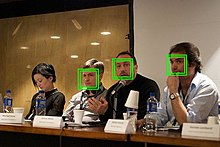

To support this purpose, OpenCV provides functions for drawing basic shapes on images.

In the example below, we draw a green square in an arbitrary location of the image.

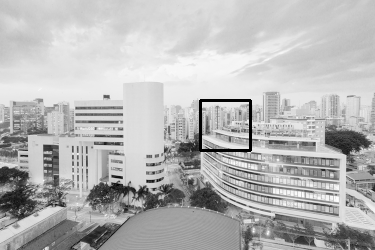

In [ ]:
# The left-top position of the square. We want it
# to start in column 200 and row 100 of the image.
# Yes, for this function, the traditional (x, y)
# order applies. Because consistency is for losers.
left_top = (200, 100)

# The right-bottom position of the square. We want
# it to have a 50x50 size, so we sum 50 to both.
right_bottom = (250, 150)

# The color of the square, represented as a triple
# of integers between 0 and 255. This triple, in
# particular, represents pure green. We will discuss
# more about color representation in a future class.
color = (0, 255, 0)

# The thickness of the square, in pixels. A minimum
# value of two is recommended to ensure visibility.
thickness = 2

# The drawing functions do not create new images, so
# we will make a copy to avoid losing the original.
output_image = image.copy()

cv.rectangle(output_image, left_top, right_bottom, color, thickness)

cv_imshow(output_image)

Oops, did I say green? We cannot draw green squares in gray level images, obviously.

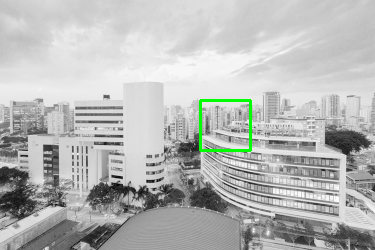

In [ ]:
output_image = cv.cvtColor(image, cv.COLOR_GRAY2BGR)

cv.rectangle(output_image, left_top, right_bottom, color, thickness)

cv_imshow(output_image)

## Activity 2: naive template matching

We are not ready to find human faces yet, so let's try something simpler: find a specific building.

In [ ]:
template = cv_imread('template.png')

cv_imshow(template)

Write code to:

* convert the template to a gray level image;

* find the location of this template is in the image;

* indicate this location with a rectangle.

You will need to iterate over all possible positions of the image where the template might be and, for each of these positions, make a pixel by pixel comparison. **Yes, this means writing four nested loops**. But, to make things easier, you can make exact pixel comparisons with `==`.

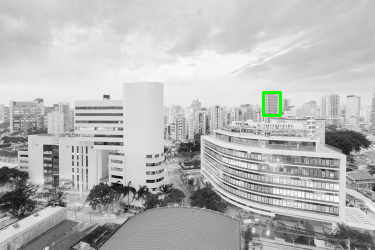

In [ ]:
template_gray = cv.cvtColor(template, cv.COLOR_BGR2GRAY)

height_temp, widht_temp = template_gray.shape

equal = 1

p1 = [0,0]
p2 = [0,0]

for i in range(height - height_temp):
    for j in range(width - widht_temp):
        equal = 1
        for y in range(height_temp):
            for x in range(widht_temp):
                equal *= (template_gray[y,x] == image[i+y,j+x])
        # if find, save the coordinates
        if equal == 1:
            p1 = [j,i]
            p2 = [j+widht_temp,i+height_temp]
            break
        if equal == 1:
            break
    if equal == 1:
        break

output_find = image.copy()
output_find = cv.cvtColor(image, cv.COLOR_GRAY2BGR)

cv.rectangle(output_find, p1, p2, color, thickness)
cv_imshow(output_find)

You can click on the toc.png tab to the left to browse by section.